# Simple Linear Regression

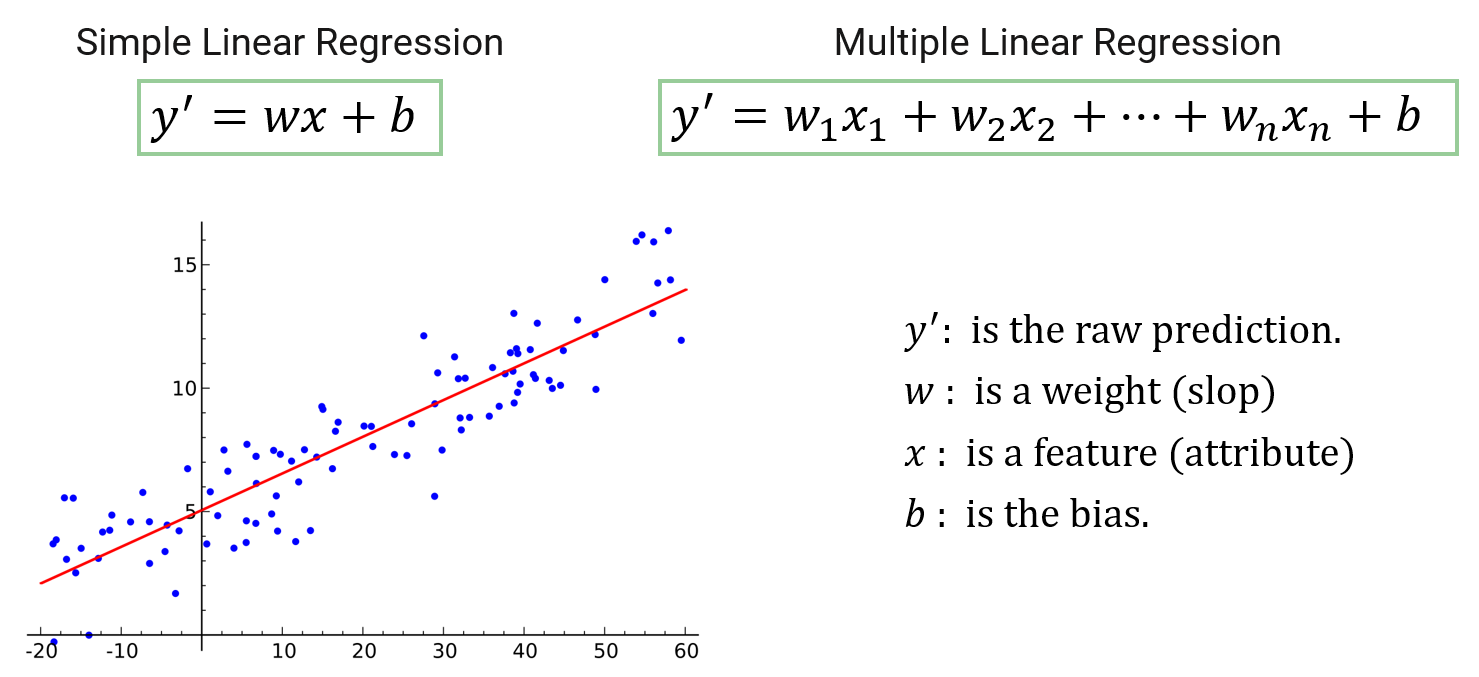
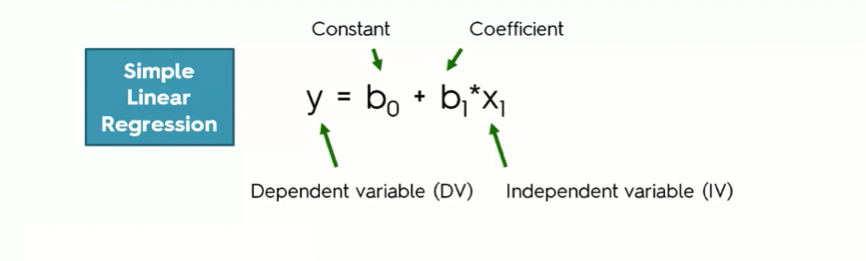

In [1]:
#import seaborn library เพื่อใช้ในการวาดภาพ
import seaborn as sns
iris = sns.load_dataset('iris') #อ่าน dataset ที่ชื่อ iris ซึ่งมีอยู่ใน seaborn library
iris.head() #แสดงข้อมูลส่วนหัวของข้อมูล iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


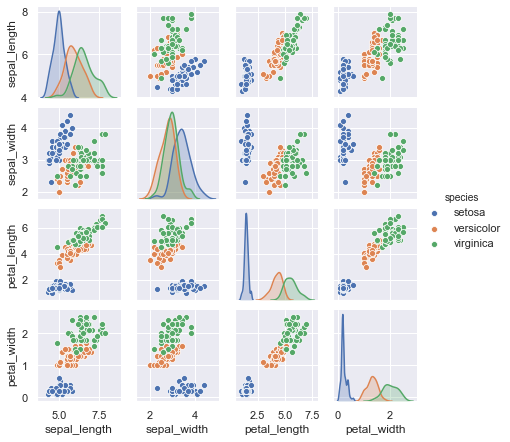

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5); #seaborn.pairplot => Plot pairwise relationships in a dataset.

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

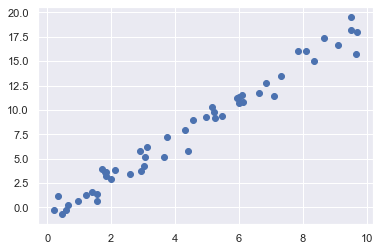

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42) #สร้างตัวเลขสุ่มโดยมีการกระจายค่าความน่าจะเป็น และกำหนด seed เป็น 42
x = 10 * rng.rand(50) #ทำการสุ่มค่า x จำนวน 50 ตัว
y = 2 * x - 1 + rng.randn(50) #ทำการสุ่มค่า y จำนวน 50 ตัว โดยที่ (2* x - 1) เป็นค่า constant ของสมการ
plt.scatter(x, y); 

In [6]:
from sklearn.linear_model import LinearRegression #เลือก model ชื่อ Linear Regression
model = LinearRegression(fit_intercept=True) #สร้าง model โดยมีการคำนวณจุดตัดแกน (intercept) ให้กับ model
model #แสดงรายละเอียดของ model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
x #แสดงค่า x ที่ได้จากการสุ่ม

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [8]:
x.shape

(50,)

In [9]:
y

array([ 7.22926896, 18.18565441, 13.52423055, 10.67206599,  0.64185082,
        1.4000462 , -0.29896653, 17.38064514, 11.36591852, 11.3984114 ,
       -0.26422614, 18.01311476, 14.97193082,  3.8584585 ,  3.66749887,
        3.59937032,  4.24562734,  9.18591626,  7.9701638 ,  5.80012793,
       10.75788366,  1.60421824,  3.736558  ,  5.13103024,  8.93392551,
       16.05975926,  2.92146552, 10.28822167, 11.2099274 , -0.7161115 ,
       11.51229264,  3.94851904,  0.26520582, 19.5423544 , 15.69289556,
       15.98984947,  5.17932245,  0.65443493, 12.77642131,  5.81548096,
        1.22109281,  9.26065077,  1.16566447, 16.66813782,  3.36710603,
       11.74868864,  6.14962364,  9.73011153,  9.40444538,  3.21035654])

In [10]:
y.shape

(50,)

In [11]:
X = x[:, np.newaxis] #เปลี่ยนจาก row vector เป็น coloumn vector และเก็บไว้ที่ตัวแปร X
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [12]:
X.shape

(50, 1)

In [13]:
# features matrix อยู่ในรูปแบบของ [n_samples, n_features]  x(50, 1)
# target array อยู่ในรูปแบบของ [n_samples, n_targets] y(50,)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model.coef_ #แสดงค่าสัมประสิทธิ์ (coefficient) ของ model ค่าความชันของกราฟ ซึ่งเป็นความสำคัญของ feature

array([1.9776566])

In [15]:
model.intercept_ #แสดงจุดตัดแกนของ model

-0.9033107255311164

In [16]:
xfit = np.linspace(-1, 11) #สร้างอาร์เรย์ที่เป็นตัวเลขเรียงกัน โดยเริ่มต้นที่ -1 และสิ้นสุดที่ 11
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [17]:
 #เปลี่ยนจาก row vector เป็น coloumn vector ให้ features matrix อยู่ในรูปแบบของ [n_samples, n_features]
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit) #ทำนายค่า y

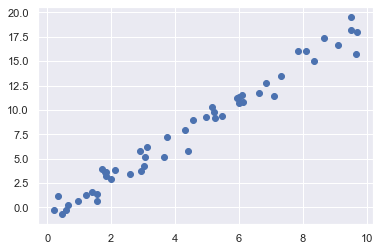

In [18]:
plt.scatter(x, y)

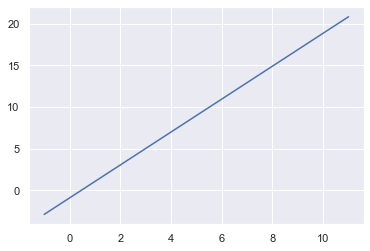

In [19]:
plt.plot(xfit, yfit);

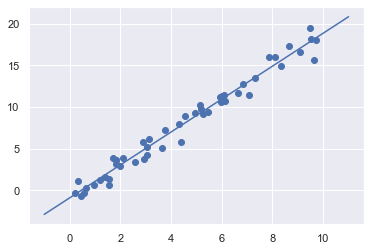

In [20]:
plt.scatter(x, y)
plt.plot(xfit, yfit);